# Data Manipulation in Python (CS2006 P2)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt;
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [42]:
df=pd.read_csv("../data/CometLanding.csv",encoding="UTF-8")

In [43]:
len(df)

77319

In [44]:
df.drop_duplicates(['id_str'],inplace = True)

In [45]:
numTweets = len(df)

In [46]:
print("Total number of Tweets: " + str(numTweets))

Total number of Tweets: 77268


In [47]:
df = df[df['text'].notnull()]

In [48]:
len(df['from_user'].unique())

50195

In [49]:
language = df.groupby('user_lang')

In [50]:
language.size()

user_lang
ar           428
bg             1
ca           309
cs            42
da            89
de          2916
el            29
en         52316
en-AU          1
en-GB         23
en-gb       1972
es          7540
es-MX          2
eu            62
fa             2
fi           108
fil           10
fr          3313
gl            36
he             2
hi             2
hu            41
id            66
it          2664
ja          1514
ko            98
msa            1
nb             1
nl           838
no            36
pl           157
pt           508
pt-PT          1
ro             8
ru           794
sv           126
th            57
tr           761
uk            43
ur             1
vi             1
xx-lc         24
zh-CN          6
zh-Hans        6
zh-cn        285
zh-tw         27
dtype: int64

In [51]:
dfNoRT = df[~df.text.str.startswith('RT', na=False)]

In [52]:
numReTweets = numTweets - len(dfNoRT) 

In [53]:
print("Total number of retweets: " + str(numReTweets))

Total number of retweets: 59999


In [54]:
dfReplies = df[~df.text.str.contains('@', na=False)]

In [55]:
numReplies = len(dfReplies)

In [56]:
print("Total number of replies: " + str(numReplies))

Total number of replies: 10624


In [57]:
import re
hashtags = []
for index, row in dfNoRT.iterrows():
    text = (row['text'].split(" "))
    for token in text:
        if token.startswith('#'):
            hashtags.append(token)



In [58]:
hashtagCount = {}

for hashtag in hashtags:
    if hashtag not in hashtagCount:
        hashtagCount[hashtag] = 1
    else:
        counter = hashtagCount.get(hashtag,'none')
        hashtagCount.update({hashtag: counter+1})
        
for key,val in hashtagCount.items():
    print (key, "=>", val)
    


##CometLanding => 27
##CometWatch => 1
#lander => 3
#navcam => 1
#cometlanding => 1834
#MiniMansbridge => 1
#CometLanding => 12741
#LetItSnow => 1
#MtRushmore => 1
#STEM => 12
#Orion => 12
#space => 76
#LunarMissionOne => 2
#NewHorizons => 3
#OrionLaunch => 2
#SongsForPhilaeToSleepBy => 4
#PhilaeLander => 10
#Livestream => 4
#esa => 76
#Orion's => 1
#OrionLaunch, => 1
#cometlanding. => 41
#RosettaMission => 28
#Ð Ð¾Ð³Ð¾Ð·Ð¸Ð½ => 1
#HappyFriday => 1
#podcast => 3
#BuffaloSnow => 1
#comedy => 3
#movies => 2
#DrMatt => 1
#Physics => 1
#UKstudy => 1
#ESA => 194
#Rosetta => 1471
#Comet => 18
#CometLanding, => 107
#KathrinAltwegg => 1
#womeninscience => 2
#GamerGate => 4
#blacklivesmatter => 1
#plur => 23
#trap => 3
#music => 8
#Ph... => 1
#GLXP => 1
#PoseToiPhilae => 144
#Philae => 734
#orion => 1
#cometlanding's => 2
#Mars => 2
#cometlandingâ€¦ => 19
#cometlandingâ€ => 9
#corsilingua => 3
#CometLanding: => 161
#rosettamission => 169
#Rose... => 1
#frostesflakes => 1
#liar => 1
#CrimingWhi

#librarylife => 1
#teamfollowback => 1
#MissionStatement => 1
#WeAreEffed => 1
#quirÃ³fano => 1
#traumatologÃ­a => 1
#Glan => 1
#ego => 2
#Anonymity? => 2
#Mentaphone => 2
#favmattpic
6. => 2
#NotJustSad => 1
#37mathsdays => 2
#TimoGH15 => 17
#AdmitoQue => 1
#BuenFinBestBuy => 1
#autoinculpacions9N => 11
#Solo99 => 1
#HousingDay => 9
#belice => 1
#tousensemble => 1
#luxleaks => 1
#BelgiumvsIceland => 1
#makinghistory => 3
#AskClapp
#Ð­Ñ‚Ð¾Ð¼ÑƒÐœÐ¸Ñ€ÑƒÐœÐµÐ½ÑÐÐµÐŸÐ¾Ð½ÑÑ‚ÑŒ
#CometLanding
#HarryMeetMichaela
#favmattpic => 1
#WishKoSaPasko
#BakitBaGanyan
#DiKoKayangTanggapin
#CometLanding
#HappyBirthdaySandaraPark
JustinBieber
DARREN => 1
#UK => 4
#era => 1
#Newsnight => 1
#iTunes => 1
#ifuckinglovescience => 1
#spacegeek => 2
#WhereDoBrokenHeartsGo => 1
#Zlatan => 1
#directioner => 1
#DirectionersAllOverTheWorld => 1
#edsheeransthlm => 1
#favmattpic => 4
#asyoudo => 1
#starbucks => 2
#coffee => 2
#stuckit!!! => 1
#Wellalmost; => 1
#codeofpoints => 1
#FIG!!! => 1
#photography => 1
#harp

#sagan => 1
#EpicEnding => 1
#Dewitos => 1
#Frito => 1
#FnacamisetaAlboran => 1
#KINGYAMMMOUNI => 1
#Religon => 1
#EndOfReligionPlease => 1
#whoneedsfiction => 1
#CometLanding
Enviamos => 1
#CometLanding"/ => 1
#comets => 2
#galaxies => 1
#bbcnews => 5
#Ambassades => 2
#cometlanding
http://t.co/FHbhyceUXx"â€ => 1
#CometLanding"
Este => 1
#nerdingout => 1
#GoScience! => 1
#Ð Ð¾Ð·ÐµÑ‚Ñ‚Ð° => 1
#cometl => 1
#AssWednesday => 1
#jesus => 1
#GodIsGood => 1
#cometLanding. => 5
#earthquake => 1
#alexfromtarget => 1
#rosettaprobe => 1
#freefrank => 1
#matttaylor => 2
#universe.tnk => 1
#spaceisawesome => 1
#ROSETTA => 4
#dwdd => 1
#CometLanding..! => 1
#cometlanding
https://t.co/jdqxD0Ng9b => 1
#JustSaying => 1
#nabila => 1
#AloneOnEarth) => 1
#CometLanding!! => 2
#ESA_Rosetta's => 2
#cometlife => 1
#nerds => 2
#BruceWillis => 6
#CometLanding

http://t.co/gZCp0HivH8 => 1
#Daura => 1
#Nautilus => 2
#DeNuestrosPoliticosNiComent => 1
#67Pâ€ => 1
#CometLanding
#67P => 1
#cometlanding
http://t.co/

#Tag => 2
#greatjob => 1
#Philae! => 5
#CometLanding:
http://t.co/u92eYpMENr => 1
#awesome! => 1
#NASATelevision => 1
#geocaching => 1
#firstrobotics => 1
#SpaceIsThePlace => 1
#Rosetta? => 8
#komeet => 4
#stijnmeuris => 1
#UnitedStates => 1
#ESA's => 4
#Posey => 1
#CometLanding:
http://t.co/QKjM6CgXJ4 => 1
#GeorgeClooney, => 1
#MatthewMcConnaughy => 1
#TeamRosetta => 1
#CometLanding
#RejectedMuppets
#Supernatural200thEpisode
#HomeToMama
#BreakTheInternet
This => 1
#HaloOutNow => 3
#JAM_RAFIQ => 1
#Fact: => 1
#ingenuity => 1
#DHSTechLab => 1
#CometLanding

http://t.co/5gGFHkVFB0 => 1
#WarlordsofDraenor => 1
#scienceoutreach => 1
#popularscience => 1
#anxious => 1
#UnitedKingdom => 2
#SocialMediaMarketing: => 1
#TechnoTerrorist => 1
#fantascienza. => 1
#sesame => 1
#rubberduckie => 2
#C67P => 2
#Churyumov => 1
#Fiscal => 2
#AlgonquinPark => 2
#Rosetta
via => 1
#Exploring => 1
#rubberduckie) => 1
#Justice => 8
#RESCUE => 8
#ARABIA => 8
#Xmas... => 2
#WelcomePhilae => 1
#Weltraumromantik"

#goodluck => 4
#AlexTweetup => 1
#ERROR! => 1
#cometlanding
"#Rejoice => 1
#Rejoice" => 1
#nature => 2
#sciencemag => 1
#surprise => 1
#rosetta
http://t.co/EprUUDHI5Z => 1
#entrepreneurship => 1
#inspire! => 1
#Roseta, => 1
#PoseToiPhilae" => 1
#look => 1
#postcards => 1
#cometlanding
And => 1
#Pamplona? => 1
#cometlanding
https://t.co/MNM88uBKAYâ€ => 1
#AndIDontWannaMissAThing => 1
#Phla => 1
#statistics => 2
#WatchThisSpace => 1
#KSP. => 1
#Mangalyaan => 1
#sciencecommunication => 1
#Europeo. => 1
#Ã‡IVA => 1
#FoM14
4. => 3
#BreakTheInternet
6. => 1
#TakeThatLive2015 => 2
#Explora => 1
#letsgo => 1
#CometLanding
O => 1
#Rome, => 1
#Italy. => 1
#langNlit => 1
#comeon => 1
#2014yearofbeauty => 1
#CometLanding
#RejectedMuppets
#5SOSLONGWAYHOME
#HomeToMama => 18
#cometlanding
http://t.co/6OSuSyiVFV => 1
#Estathe => 1
#KeepFingersCrossed => 1
#stream => 1
#RiodeJaneiro => 1
#Brazil => 1
#Telescopes => 1
#makerbot => 1
#PrettyAmazingStuff => 1
#cometlanding
https://t.co/6Kww9A90eR => 1
#B

#Nantes => 1
#7HoursOfSuspence => 1
#BasedOnATrueStory => 1
#strike => 1
#CometLanding
#HomeToMama
#HariAyah
#HappyBirthdaySandaraPark
#WishKoSaPasko => 2
#ESA_rosettamission => 1
#Malaysia => 1
#fragdieesa => 1
#lisp => 1
#EspacioTrastornados => 1
#AGU2013 => 1
#Separatisten => 1
#Rosetta.
#CometLanding => 1
#accometiamo => 1
#CometLanding
Wow => 1
#DanIsBuzzing => 1
#climate => 1
#CERN => 1
#historybeenwritten => 1
#7HoursofTerror => 2
#Rosetta...landing => 1
#webcast

http://t.co/q7wG4NDP1P => 1
#timing => 1
#report => 1
#nerd => 1
#allnighter => 1
#7HoursOfTerror. => 1
#immature => 1
#HAPPYBIRTHDAYPHILAE => 1
#relief => 1
#firsthurdle => 1
#BNEGlobalCafe
#CometLanding
Hi => 6
#Tchouri!!!! => 1
#itsgone! => 1
#blogger => 1
#67PChuryumovGerasimenko => 1
#DobleCheckAzul => 1
#Philae2014. => 1
#Wheeee => 1
#SucceededSoSuccessfully => 1
#CometLanding!
First => 1
#FleetwoodMac => 1
#havesaveland => 1
#7HoursOfTerror => 1
#microaggressions => 1
#comet's => 1
#jp86 => 1


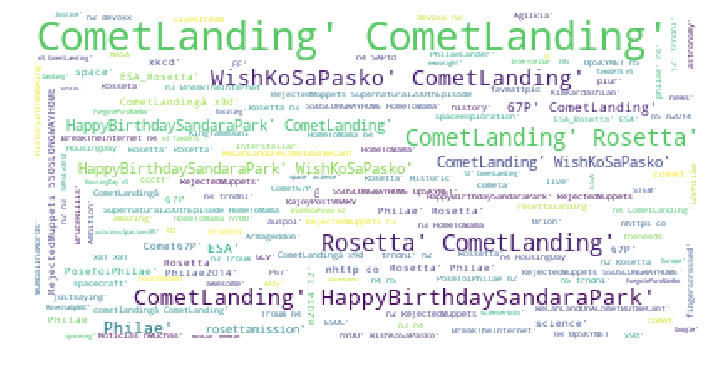

In [ ]:
words = []

for key,val in hashtagCount.items():
    words.append(key)
    
words = [e[1:] for e in words]
stopwords = set(STOPWORDS)
stopwords.add("CometLanding")


wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30000,max_font_size=40, random_state=42).generate(str(hashtags))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordCloud.png", dpi=5500)

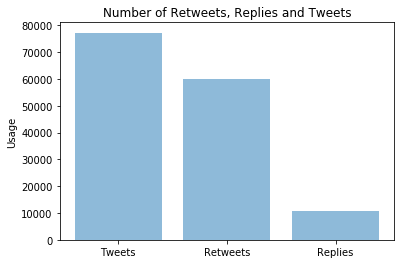

In [60]:
    objects = ('Tweets','Retweets', 'Replies')
    y_pos = np.arange(len(objects))
    performance = [numTweets,numReTweets,numReplies]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Usage')
    plt.title('Number of Retweets, Replies and Tweets')

    plt.show()

In [69]:
#print(str(df['source']).split(">"))
#language = df.groupby('source')
#language.size()

dfSource = df
import re
items = []
for index, row in dfSource.iterrows():
    text = (row['source'])
    for token in str(text):
        if token.endswith('>'):
            split1 = text.split("</a>")
            split2 = str(split1).split(">")
            split2 = str(split2).split(",")
            items.append(str(split2[1]))
            
deviceCount = {}

for device in items:
    if device not in deviceCount:
        deviceCount[device] = 1
    else:
        counter = deviceCount.get(device,'none')
        deviceCount.update({device: counter+1})
        
for key,val in deviceCount.items():
    print (key, "=>", val)


 "Twitter Web Client' => 55850
 "Twitter for Websites' => 2924
 "Twitter for iPad' => 6564
 "Twitter for iPhone' => 27486
 "Twitter for Android' => 25540
 "IFTTT' => 606
 "Buffer' => 186
 "TweetDeck' => 8150
 "AllFilmBot' => 4
 "Tweetbot for Mac' => 578
 "Twitter for BlackBerryÂ®' => 690
 "Gwittr Writer' => 2
 "dlvr.it' => 3342
 "Hootsuite' => 1592
 "GatorBot' => 2
 "Mobile Web (M5)' => 630
 "Tweetbot for iÎŸS' => 2110
 "Instagram' => 112
 "my-app-z' => 6
 "Twitter for Android Tablets' => 1794
 "Mobile Web (M2)' => 456
 "HubSpot' => 16
 "TweetAdder v4' => 320
 "Echofon' => 518
 "OS X' => 44
 "Google' => 20
 "TweetCaster for Android' => 954
 "Carbon for Android' => 54
 "Dat post' => 10
 "423Diotima' => 12
 "iOS' => 174
 "Twitter for  Android' => 210
 "Flipboard' => 70
 "PlumeÂ\\xa0forÂ\\xa0Android' => 442
 "Twitter for BlackBerry' => 582
 "botly' => 54
 "MetroTwit' => 74
 "YoruFukurou' => 70
 "Twitter for Windows Phone' => 1864
 "Favstar.FM' => 8
 "RNAutoRetweet' => 72
 "Twitterrific' =

 "rowi for Windows Phone' => 2
 "RemoveFriends' => 2
 "Diasporabr' => 2
 "TagtheBirdbot' => 2
 "TopProxyServer' => 2
 "RT pmarca' => 2
 "Buzz Pulse' => 2
 "Qui a TT?' => 2
 "rt daily news breaking news' => 4
 "Janetter Pro for iPhone' => 2
 "WichtigeNachrichten' => 2
 "KunzBot' => 2
 "tagfav' => 2
 "Samsung Smart TV' => 2
 "Horloge_Parlante' => 2
 "java client hookup' => 2
 "Rocket!' => 2
 "RTFORCB' => 2
 "PeopleBrowsr' => 2
 "BossKitter.' => 2


In [92]:
import operator
topItems = sorted(deviceCount.items(), key=operator.itemgetter(1),reverse=True)

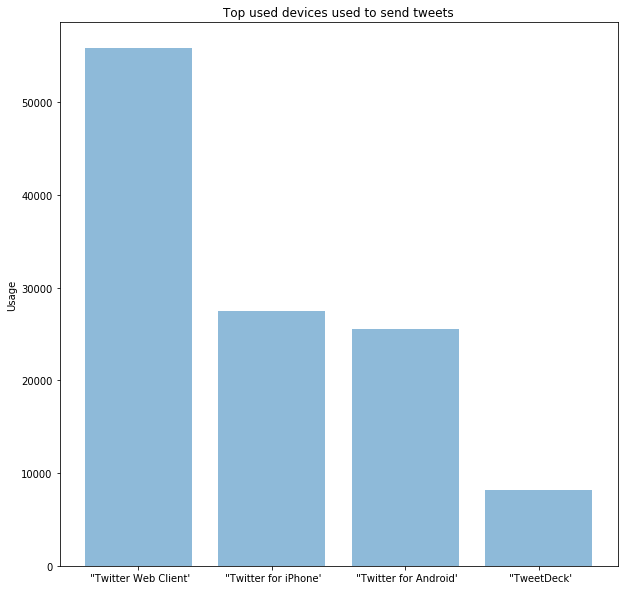

In [109]:

topDevice = topItems[0][0]
topDeviceNum = topItems[0][1]
    
secondDevice = topItems[1][0]
secondDeviceNum = topItems[1][1]
    
thirdDevice = topItems[2][0]
thirdDeviceNum = topItems[2][1]

fourthDevice = topItems[3][0]
fourthDeviceNum = topItems[3][1]


objects = (topDevice,secondDevice,thirdDevice,fourthDevice)
y_pos = np.arange(len(objects))
performance = [topDeviceNum,secondDeviceNum,thirdDeviceNum,fourthDeviceNum]

plt.figure(figsize=(10,10))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Top used devices used to send tweets')

plt.show()